In [ ]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import math
import numpy as np
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.stats import poisson
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tools.numdiff import approx_hess1, approx_hess2, approx_hess3
import pandas as pd

df = pd.read_csv('D:/data/Zircons/Roberts_Spencer_2015.csv')
ages = df["U-Pb (Ma)"]
data = plt.hist(ages, bins = 200)

In [ ]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

In [ ]:
zircons_data = data[0]
ages = data[1][1:]
print(len(ages))
print(max(ages))

In [ ]:
plt.plot(ages, zircons_data, "o", markersize=3, alpha=1)
plt.ylabel("Zircons count")
plt.xlabel("Ages");

In [ ]:
tr =pm.distributions.transforms

Order = tr.Ordered()

#Logodd = tr.LogOddsTransform()

#chain_tran = tr.Chain([Logodd, Order])

k = 5

In [7]:
with pm.Model() as model:
    
    k =3
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(0,max(ages),k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(tune = 1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 501 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


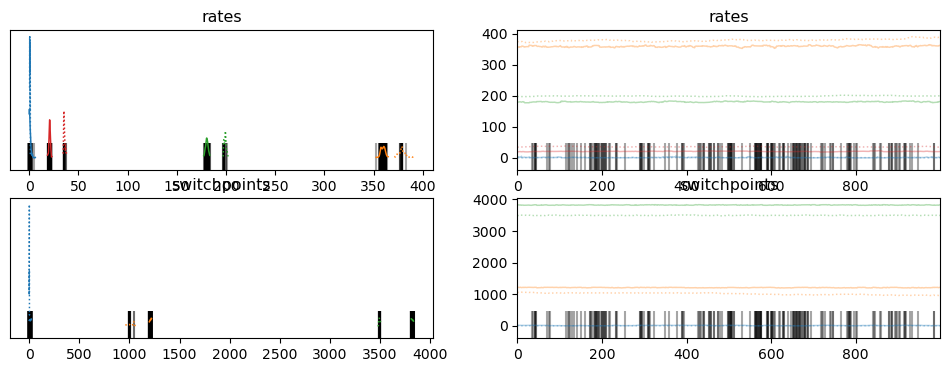

In [8]:
with model:
    az.plot_trace(tr)

In [10]:
pm.summary(tr)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],0.869,0.629,0.009,1.954,0.088,0.063,33.0,54.0,1.17
rates[1],369.273,10.304,355.829,383.487,7.089,5.936,3.0,11.0,2.15
rates[2],189.815,9.418,178.212,200.820,6.590,5.560,3.0,22.0,1.90
rates[3],28.250,7.512,19.958,37.569,5.268,4.449,3.0,28.0,1.86
switchpoints[0],6.234,6.693,0.015,19.135,3.585,2.784,3.0,53.0,1.63
switchpoints[1],1112.608,100.339,974.669,1220.238,70.395,59.486,3.0,11.0,2.27
switchpoints[2],3659.580,163.952,3486.520,3831.758,115.399,97.596,3.0,95.0,1.83


In [15]:
with pm.Model() as model:
    
    k =4
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(0,max(ages),k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(tune = 1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 541 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],0.884,0.607,0.053,1.548,0.140,0.101,16.0,12.0,1.74
rates[1],376.151,6.815,367.488,385.139,4.726,3.972,3.0,36.0,2.08
rates[2],181.194,26.804,151.154,210.975,18.826,15.907,3.0,25.0,1.89
rates[3],284.172,15.936,265.976,306.200,11.152,9.407,3.0,14.0,2.23
rates[4],60.734,0.612,59.627,61.956,0.113,0.081,26.0,103.0,1.12
switchpoints[0],0.492,0.246,0.181,0.752,0.172,0.146,3.0,14.0,2.03
switchpoints[1],1059.832,44.238,1007.659,1111.255,31.035,26.217,3.0,13.0,2.17
switchpoints[2],1996.335,420.398,1568.895,2431.922,296.047,250.432,3.0,16.0,2.21
switchpoints[3],2867.944,6.062,2856.901,2876.271,1.201,0.860,25.0,178.0,1.07


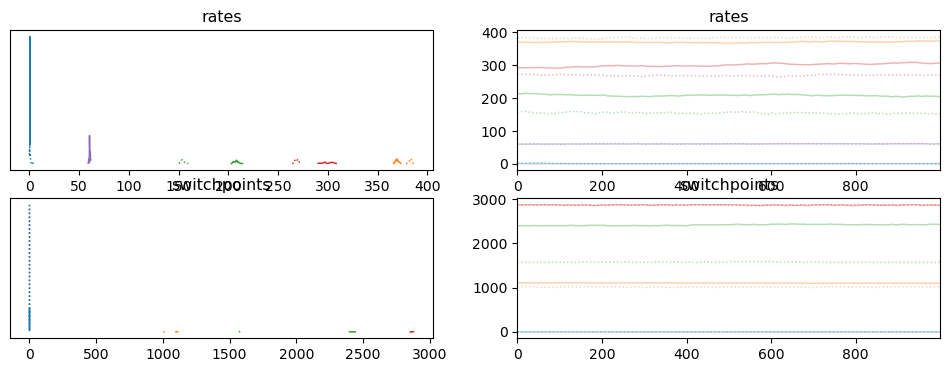

In [16]:
with model:
    az.plot_trace(tr)
    
pm.summary(tr)

In [18]:
with pm.Model() as model:
    
    k =5
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(tune = 1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 559 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],293.647,7.092,281.255,307.465,1.218,0.869,34.0,73.0,1.08
rates[1],408.815,35.787,369.013,450.929,25.093,21.185,3.0,25.0,1.84
rates[2],197.778,61.855,132.374,263.164,43.540,36.824,3.0,24.0,2.02
rates[3],227.453,60.859,163.615,292.175,42.828,36.218,3.0,39.0,1.87
rates[4],258.864,11.395,245.374,273.280,7.948,6.695,3.0,45.0,1.85
rates[5],60.732,0.717,59.300,61.848,0.153,0.110,23.0,106.0,1.09
switchpoints[0],100.406,0.495,99.846,100.917,0.348,0.294,3.0,13.0,1.91
switchpoints[1],868.764,230.351,632.071,1104.540,162.210,137.214,3.0,35.0,1.97
switchpoints[2],1390.755,188.392,1198.450,1587.806,132.649,112.204,3.0,31.0,2.01
switchpoints[3],1975.562,147.976,1823.274,2130.989,104.179,88.117,3.0,59.0,1.86


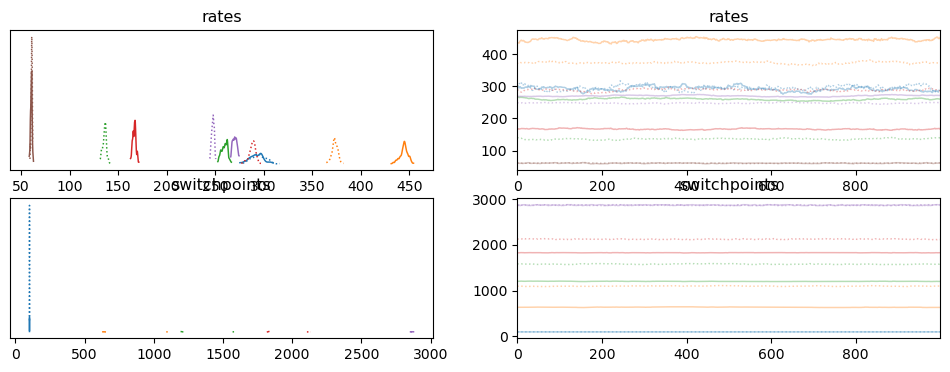

In [19]:
with model:
    az.plot_trace(tr)
    
pm.summary(tr)

In [20]:
with pm.Model() as model:
    
    k =6
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(tune = 1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 584 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],299.471,5.581,293.613,315.249,2.387,1.793,7.0,17.0,1.81
rates[1],336.656,22.316,310.184,360.093,15.693,13.270,2.0,16.0,2.97
rates[2],194.008,65.314,128.630,261.285,45.995,38.908,2.0,35.0,2.55
rates[3],245.655,20.212,223.542,265.970,14.218,12.025,3.0,23.0,1.94
rates[4],87.859,5.575,80.250,95.628,3.801,3.171,3.0,23.0,2.09
rates[5],64.561,13.895,49.527,78.774,9.774,8.269,3.0,11.0,2.21
rates[6],12.869,12.269,0.533,25.224,8.641,7.310,3.0,13.0,2.28
switchpoints[0],100.795,0.129,100.669,100.963,0.088,0.074,3.0,19.0,2.19
switchpoints[1],1309.086,146.752,1162.034,1458.664,103.349,87.427,3.0,33.0,1.98
switchpoints[2],1821.221,295.476,1525.413,2119.133,208.094,176.037,3.0,36.0,1.91


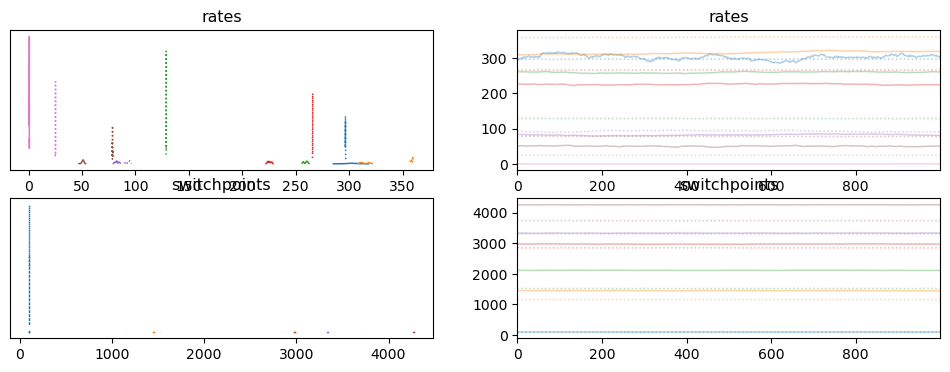

In [21]:
with model:
    az.plot_trace(tr)
    
pm.summary(tr)

In [22]:
with pm.Model() as model:
    
    k =7
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,initval = np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(tune = 1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 555 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],303.561,6.164,291.982,315.055,2.020,1.475,9.0,29.0,1.14
rates[1],406.530,38.465,366.047,448.854,27.071,22.894,3.0,12.0,2.26
rates[2],201.814,62.315,136.886,266.880,43.873,37.109,3.0,16.0,2.01
rates[3],242.888,9.396,231.820,255.079,6.571,5.541,2.0,14.0,3.02
rates[4],165.233,81.917,80.151,251.825,57.664,48.770,3.0,16.0,1.88
rates[5],80.840,4.835,74.522,87.288,3.326,2.785,3.0,17.0,1.87
rates[6],25.783,6.887,17.815,33.261,4.835,4.090,3.0,24.0,1.91
rates[7],1.053,0.457,0.596,1.526,0.322,0.272,3.0,11.0,2.19
switchpoints[0],98.936,0.978,97.361,99.955,0.664,0.553,3.0,16.0,2.10
switchpoints[1],886.297,237.519,643.996,1125.447,167.270,141.504,2.0,16.0,2.44


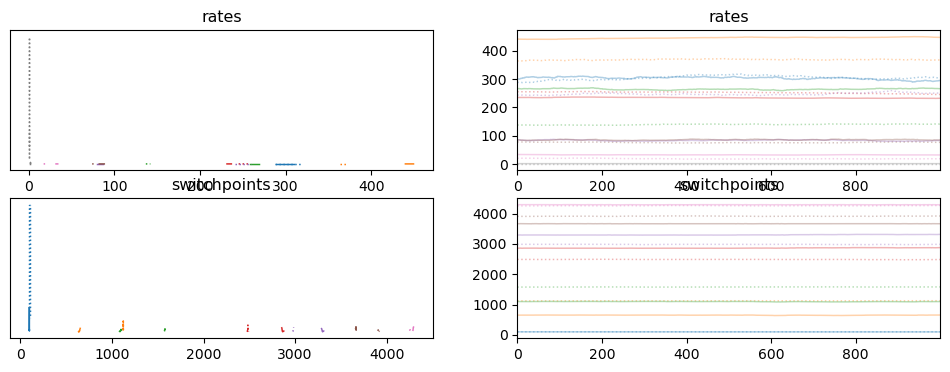

In [23]:
with model:
    az.plot_trace(tr)
    
pm.summary(tr)

In [24]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(tune = 1000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 619 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],296.344,2.905,291.063,301.650,1.787,1.439,3.0,11.0,1.72
rates[1],415.697,7.775,402.937,423.672,5.179,4.291,3.0,29.0,1.87
rates[2],322.132,56.121,262.850,382.219,39.492,33.396,3.0,49.0,1.87
rates[3],239.843,6.077,232.575,247.559,4.222,3.550,3.0,41.0,1.83
rates[4],192.304,92.854,97.786,288.596,65.383,55.306,3.0,21.0,1.96
rates[5],136.634,47.642,86.543,187.832,33.525,28.350,3.0,14.0,2.03
rates[6],142.430,82.751,56.023,227.462,58.268,49.292,3.0,26.0,2.18
rates[7],64.887,36.082,27.534,104.094,25.401,21.484,3.0,21.0,2.11
rates[8],16.828,16.012,0.828,33.770,11.271,9.533,3.0,11.0,2.19
switchpoints[0],100.186,0.325,99.857,100.517,0.229,0.194,2.0,12.0,2.58


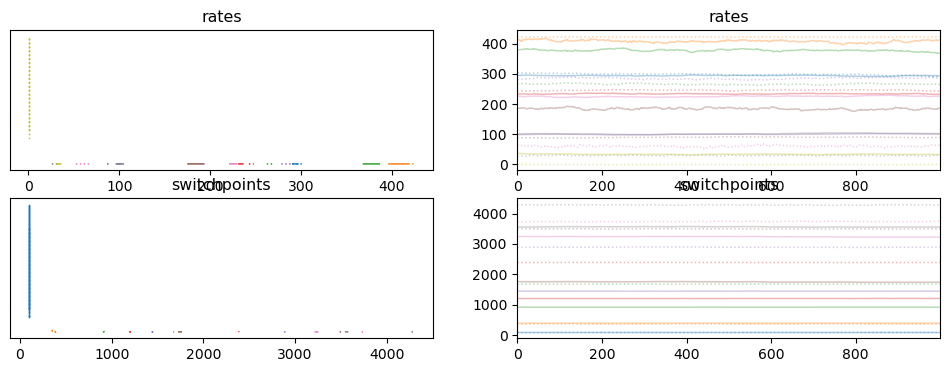

In [25]:
with model:
    az.plot_trace(tr)
    
pm.summary(tr)

In [26]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(draws =5000,tune = 5000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 3372 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],291.788,7.955,276.084,306.695,2.674,1.958,9.0,71.0,1.20
rates[1],377.709,21.000,353.171,406.761,14.581,12.257,3.0,83.0,1.83
rates[2],297.726,153.197,141.765,458.774,108.201,91.654,3.0,23.0,2.07
rates[3],257.760,46.965,206.986,310.850,33.111,28.024,3.0,90.0,1.87
rates[4],286.874,31.802,251.241,326.966,22.369,18.913,3.0,12.0,2.16
rates[5],194.616,59.261,125.907,257.413,41.836,35.439,3.0,11.0,2.23
rates[6],86.989,2.634,82.696,91.274,1.660,1.345,3.0,45.0,1.88
rates[7],37.224,14.243,21.814,53.177,10.032,8.487,3.0,27.0,1.92
rates[8],11.056,5.963,4.684,17.930,4.194,3.546,3.0,13.0,2.06
switchpoints[0],109.389,7.340,99.960,119.790,5.029,4.204,3.0,40.0,2.24


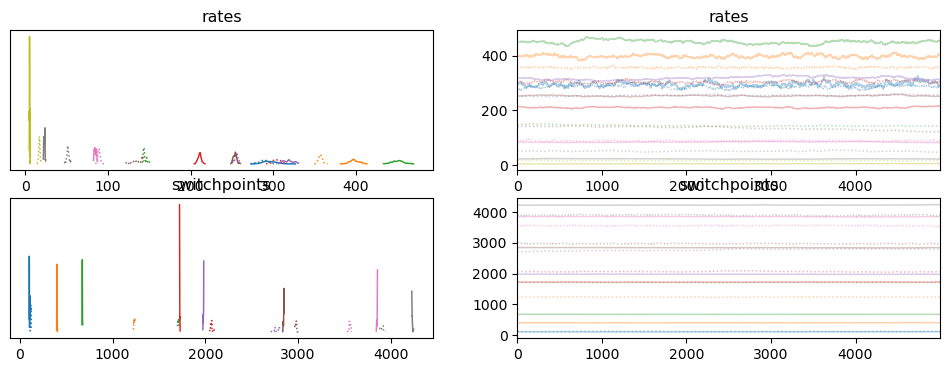

In [27]:
with model:
    az.plot_trace(tr)
    
pm.summary(tr)

In [28]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr = pm.sample(draws =20000,tune = 5000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 5_000 tune and 20_000 draw iterations (10_000 + 40_000 draws total) took 8398 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],295.039,7.368,280.937,308.085,1.439,1.029,27.0,60.0,1.10
rates[1],377.076,52.690,320.667,440.138,37.191,31.495,3.0,15.0,2.23
rates[2],301.537,62.242,235.862,371.268,43.917,37.183,3.0,40.0,1.84
rates[3],260.557,3.530,255.643,267.332,1.765,1.353,4.0,36.0,1.50
rates[4],98.895,10.540,86.843,115.558,7.269,6.093,3.0,12.0,2.03
rates[5],182.916,84.170,98.481,271.912,59.498,50.418,2.0,12.0,2.63
rates[6],71.435,18.478,50.263,92.020,13.028,11.030,3.0,15.0,1.98
rates[7],30.810,8.860,20.096,41.375,6.212,5.245,3.0,74.0,1.84
rates[8],7.598,1.031,5.616,9.462,0.394,0.292,7.0,180.0,1.24
switchpoints[0],100.640,1.817,99.326,104.575,0.968,0.751,4.0,24.0,2.04


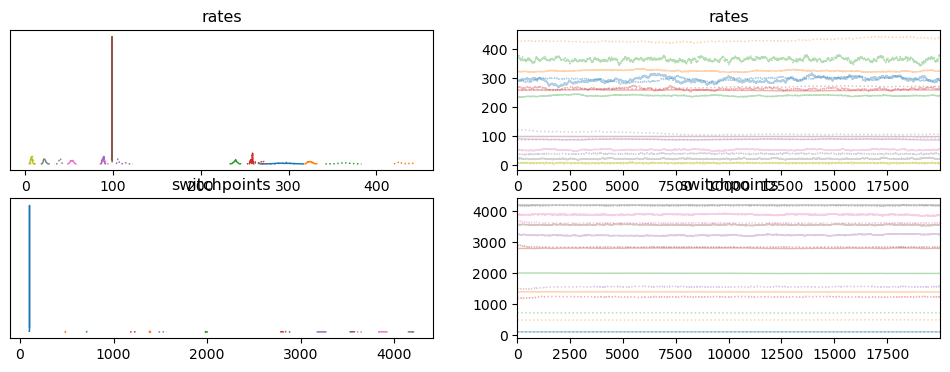

In [29]:
with model:
    az.plot_trace(tr)
    
pm.summary(tr)

In [30]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr50000 = pm.sample(draws =45000,tune = 5000, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rates, switchpoints]


Sampling 2 chains for 5_000 tune and 45_000 draw iterations (10_000 + 90_000 draws total) took 16865 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rates[0],290.980,9.548,272.776,308.301,4.219,3.172,5.0,30.0,1.31
rates[1],436.821,8.570,423.895,452.566,5.112,4.075,3.0,88.0,1.66
rates[2],310.282,34.967,269.052,351.911,24.590,20.788,3.0,46.0,2.02
rates[3],202.645,32.648,159.070,241.296,22.931,19.378,3.0,15.0,2.26
rates[4],172.882,69.675,99.916,247.388,49.232,41.711,3.0,25.0,1.84
rates[5],269.676,62.740,200.057,339.286,44.263,37.474,3.0,171.0,1.84
rates[6],196.567,77.196,114.502,277.281,54.551,46.226,3.0,87.0,1.85
rates[7],79.613,15.481,62.414,97.234,10.913,9.235,3.0,54.0,1.87
rates[8],16.373,14.747,0.809,32.604,10.421,8.829,2.0,11.0,2.52
switchpoints[0],105.345,4.572,99.867,112.843,2.788,2.236,4.0,46.0,1.61


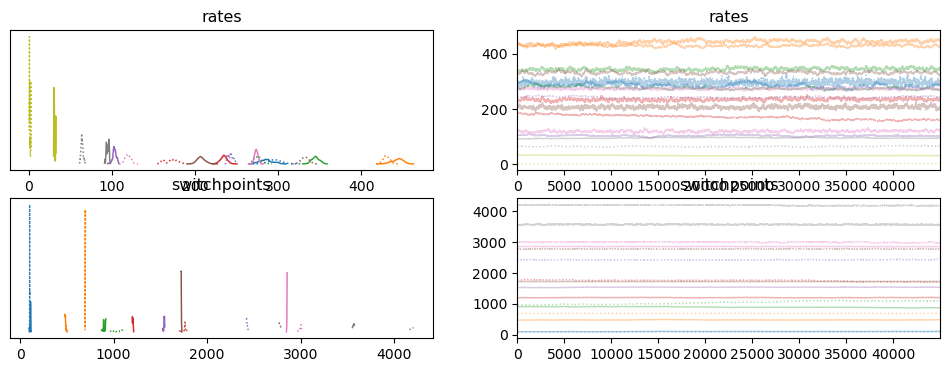

In [31]:
with model:
    az.plot_trace(tr50000)
    
pm.summary(tr50000)

In [36]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr100000 = pm.sample(draws =80000,tune = 20000, cores = 1)

In [34]:
with model:
    az.plot_trace(tr100000)
    
pm.summary(tr100000)

In [ ]:
with pm.Model() as model:
    
    k =8
    
    rates = pm.Exponential("rates",1.0,shape = k + 1)
    
    switchpoints = pm.Uniform("switchpoints", lower = 0, upper = max(ages) , shape = k, transform = Order,  initval=np.linspace(100,max(ages)-100,k))
    #x = pm.Uniform("x", 0.0, 1.0, shape = n, transform = chain_tran)
    rate = rates[0]
    for i in range(k):
        rate = pm.math.switch(switchpoints[i] >= ages, rate, rates[i+1])
        
    disasters = pm.Poisson("counts", rate, observed=zircons_data)
    
    tr100000 = pm.sample(draws =80000,tune = 20000, cores = 1)

In [ ]:
with model:
    az.plot_trace(tr100000)
    
pm.summary(tr100000)